In [160]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [161]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    if effort > 0 and effort <= 0.5:
        quality = 2*effort
    elif effort > 0.5 and effort <= 1:
        quality = 1 - 2*(effort - 0.5)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
def contributioncalc(deadline, plots, uftype, printcontri):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**i)))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*i))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(contlist, sum(contlist))
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3, title = f"Effort decisions by period for deadline = {deadline}",) ##colormap = 'hot')
        #plot



    return cltemp     

In [162]:
# Assign Variables

delta = 0.9         # Discount Factor
beta = 0.9          # Temporal Bias
w = 2          # Required accumulated Effort
r = 1.04           # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.9; beta = 0.9; w = 2;


[-0.8356896412335921, -0.20439597361336004, 0.024439261373178423, 0.20979580171227452, 0.3599345993869423, 0.4815470255034232, 0.5800530906577728, 0.659843003432796, 0.7244728327805647] 1.9999999999999998
[-0.8356896412335921, -0.4097865015513533, 0.2507816518290472, 0.39313313798152816, 0.5084378417650377, 0.6018346518296805, 0.6774860679820413, 0.7387637150654534, 0.7883986092030173] 2.71335953287086
[-0.8356896412335921, -0.4097865015513533, -0.0795425428924117, 0.5352923334847981, 0.6235867901226864, 0.695105299999376, 0.7530352929994946, 0.7999585873295906, 0.8379664557369684] 2.9199260739955566
[-0.8356896412335921, -0.4097865015513533, -0.0795425428924117, 0.17670493737021808, 0.7129347618202158, 0.7674771570743748, 0.8116564972302436, 0.8474417627564972, 0.8764278278327627] 2.867624258406955
[-0.8356896412335921, -0.4097865015513533, -0.0795425428924117, 0.17670493737021808, 0.3758402992677218, 0.8237188650320629, 0.857212280675971, 0.8843419473475365, 0.9063169773515045] 2.699

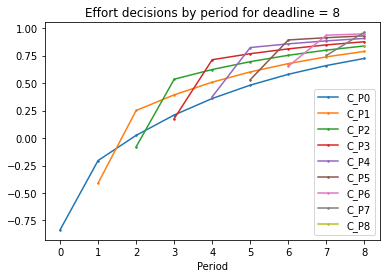

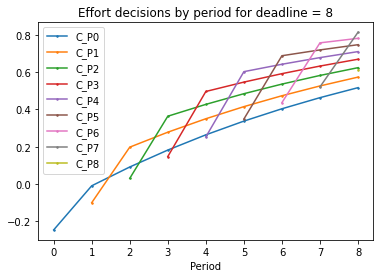

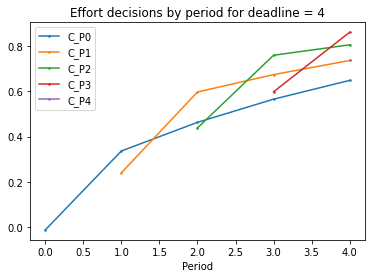

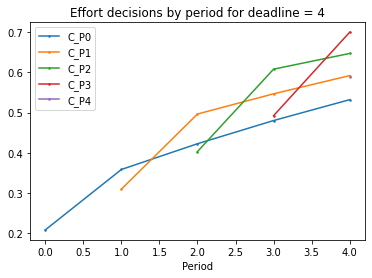

In [163]:
# Interesting Plots:
plottest1 = contributioncalc(8, True, "sqrt", True)
plottest2 = contributioncalc(8, True, "log", False)
plottest3 = contributioncalc(4, True, "sqrt", False)
plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt
0          2  2.000000    0.693147     1.414214    0.640854     1.307520
1          3  2.684059    0.987330     1.638310    0.877733     1.456452
2          4  2.691448    0.990079     1.640563    0.846324     1.402360
3          5  2.925593    1.073497     1.710436    0.882336     1.405854
4          6  3.109370    1.134420     1.763341    0.896549     1.393594
5          7  3.309958    1.196936     1.819329    0.909573     1.382541
6          8  3.560144    1.269801     1.886834    0.927831     1.378691
7          9  3.784629    1.330948     1.945412    0.935106     1.366821
8         10  3.926219    1.367677     1.981469    0.923953     1.338609
9         11  4.225201    1.441067     2.055529    0.936090     1.335233
10        12  4.325318    1.464486     2.079740    0.914713     1.298999
11        13  4.430377    1.488485     2.104846    0.893945     1.264116
12        14  4.661894    1.539422     2.159142    

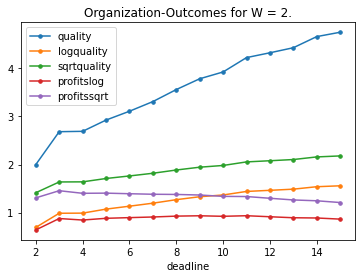

In [164]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 4*t + 8

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "sqrt", False)]
    qualitylist += [sum(quallist)]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq

qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.")

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt} Periods.")